# 1.  Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# 3. PREPROCESSING

In [3]:
df.columns.tolist()     #columnslist

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Replacing Categorical data to Numerical values (Encoding)

 gender, ever_married,  work_type, Residence_type,  smoking_status

In [4]:
from sklearn import preprocessing                           #using Label Encoder
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])  
#df['ever_married'] = label_encoder.fit_transform(df['ever_married']) 
df['work_type']= label_encoder.fit_transform(df['work_type']) 
df['Residence_type']= label_encoder.fit_transform(df['Residence_type']) 
df['smoking_status']= label_encoder.fit_transform(df['smoking_status']) 
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,Yes,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,Yes,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,Yes,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,Yes,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,Yes,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,Yes,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,Yes,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,Yes,2,0,166.29,25.6,1,0


# NAN Value to numeric value

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

############### age #########################################################################################

df['age'] = df['age'].fillna((df['avg_glucose_level'].mean()))
df['age']= df['age'].astype(int)
print (df['age'].unique()) 
print() 
print(df['age'].dtypes) 
df

In [5]:
#####################  ever_married   #################################################################################



print (df['ever_married'].describe())
print (df['ever_married'].unique())
em = {'Yes': 1, 'No': 2}
df['ever_married'] = df['ever_married'].map(em)
df['ever_married']= df['ever_married'].astype(int)
print(df['ever_married'].dtypes)
df

count     5110
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object
['Yes' 'No']
int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [6]:
############### bmi ###########################################################################################

df['bmi'] = df['bmi'].fillna((df['bmi'].mean()))
print (df['bmi'].unique()) 
print() 
print(df['bmi'].dtypes) 
df

[36.6        28.89323691 32.5        34.4        24.         29.
 27.4        22.8        24.2        29.7        36.8        27.3
 28.2        30.9        37.5        25.8        37.8        22.4
 48.9        26.6        27.2        23.5        28.3        44.2
 25.4        22.2        30.5        26.5        33.7        23.1
 32.         29.9        23.9        28.5        26.4        20.2
 33.6        38.6        39.2        27.7        31.4        36.5
 33.2        32.8        40.4        25.3        30.2        47.5
 20.3        30.         28.9        28.1        31.1        21.7
 27.         24.1        45.9        44.1        22.9        29.1
 32.3        41.1        25.6        29.8        26.3        26.2
 29.4        24.4        28.         28.8        34.6        19.4
 30.3        41.5        22.6        56.6        27.1        31.3
 31.         31.7        35.8        28.4        20.1        26.7
 38.7        34.9        25.         23.8        21.8        27.5
 24.6      

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [61]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df['ae'] = df['age'] * df['ever_married']
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ae
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,67.0
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,61.0
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,80.0
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,49.0
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0,80.0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,81.0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,35.0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,51.0


In [8]:
df['ab'] = df['avg_glucose_level'] * df['bmi']
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ae,ab
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,67.0,8370.054000
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,61.0,5842.501436
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,80.0,3442.400000
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,49.0,5890.312000
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,79.0,4178.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0,80.0,2419.808591
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0,81.0,5008.000000
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0,35.0,2539.494000
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0,51.0,4257.024000


In [9]:
df = df.drop(['id', 'age', 'ever_married', 'avg_glucose_level', 'bmi' ], axis = 1)       #dropping unnecessary columns
df

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,ae,ab
0,1,0,1,2,1,1,1,67.0,8370.054000
1,0,0,0,3,0,2,1,61.0,5842.501436
2,1,0,1,2,0,2,1,80.0,3442.400000
3,0,0,0,2,1,3,1,49.0,5890.312000
4,0,1,0,3,0,2,1,79.0,4178.880000
...,...,...,...,...,...,...,...,...,...
5105,0,1,0,2,1,2,0,80.0,2419.808591
5106,0,0,0,3,1,2,0,81.0,5008.000000
5107,0,0,0,3,0,2,0,35.0,2539.494000
5108,1,0,0,2,0,1,0,51.0,4257.024000


# Outliers Imputing

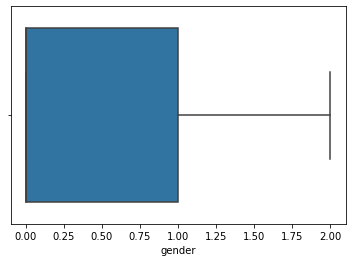

In [10]:
a1 = sns.boxplot(x=df['gender'])

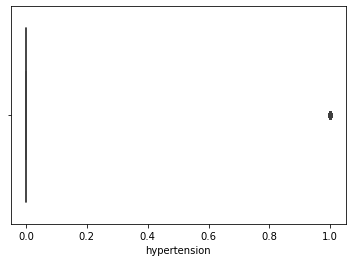

In [11]:
a2 = sns.boxplot(x=df['hypertension'])

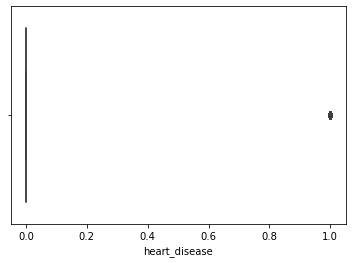

In [12]:
a3 = sns.boxplot(x=df['heart_disease'])

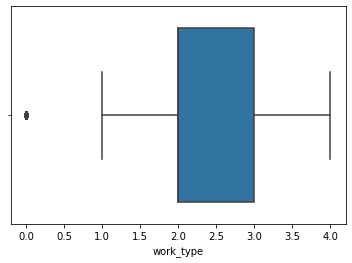

In [13]:
a4 = sns.boxplot(x=df['work_type'])

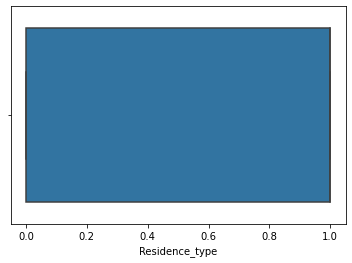

In [14]:
a6 = sns.boxplot(x=df['Residence_type'])

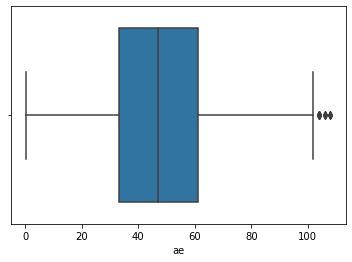

In [44]:
a6 = sns.boxplot(x=df['ae'])

In [10]:
df = df[(df['ae']<110)]
print(df['ae'].unique())
df

[ 67.    61.    80.    49.    79.    81.    74.    59.    78.    54.
  50.    64.    75.    71.    52.    82.    65.    58.    69.    57.
  42.    96.    72.    63.    60.    76.    39.    77.    73.    56.
  45.    70.    66.    51.    43.    47.    53.    38.    68.    55.
   2.64  46.    32.    48.    98.    28.     6.    16.    37.    40.
  44.    25.    27.    34.    26.     8.    30.    22.    36.    33.
  24.    29.     1.28  41.    23.     1.76  10.    31.    21.    14.
  62.     4.    88.    86.    18.    35.   106.    20.     3.6    0.64
  84.     2.16 104.    12.     2.32 108.   102.    19.     2.     2.8
   3.44 100.     0.48  90.     3.28   3.12   1.44   3.76   2.48  92.
   1.6   94.     0.8    0.16   2.96   1.12   0.96   0.32]


,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,ae,ab
0,1,0,1,2,1,1,1,67.0,8370.054000
1,0,0,0,3,0,2,1,61.0,5842.501436
2,1,0,1,2,0,2,1,80.0,3442.400000
3,0,0,0,2,1,3,1,49.0,5890.312000
4,0,1,0,3,0,2,1,79.0,4178.880000
...,...,...,...,...,...,...,...,...,...
5105,0,1,0,2,1,2,0,80.0,2419.808591
5106,0,0,0,3,1,2,0,81.0,5008.000000
5107,0,0,0,3,0,2,0,35.0,2539.494000
5108,1,0,0,2,0,1,0,51.0,4257.024000


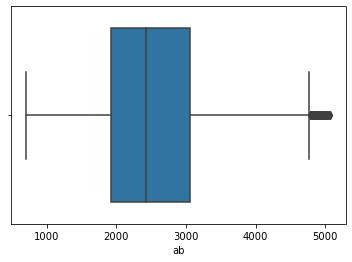

In [43]:
a6 = sns.boxplot(x=df['ab'])

In [11]:
df = df[(df['ab']<5080)]
print(df['ab'].unique())
df

[3442.4   4178.88  1920.466 ... 2539.494 4257.024 2234.336]


,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,stroke,ae,ab
2,1,0,1,2,0,2,1,80.0,3442.400000
4,0,1,0,3,0,2,1,79.0,4178.880000
6,1,1,1,2,0,2,1,74.0,1920.466000
8,0,0,0,2,0,0,1,59.0,2200.219991
9,0,0,0,2,1,0,1,78.0,1417.394000
...,...,...,...,...,...,...,...,...,...
5105,0,1,0,2,1,2,0,80.0,2419.808591
5106,0,0,0,3,1,2,0,81.0,5008.000000
5107,0,0,0,3,0,2,0,35.0,2539.494000
5108,1,0,0,2,0,1,0,51.0,4257.024000


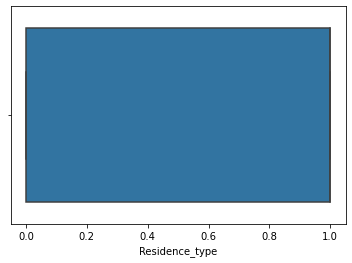

In [16]:
a6 = sns.boxplot(x=df['Residence_type'])

In [65]:
df.columns.tolist()

['gender',
 'hypertension',
 'heart_disease',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'ae',
 'ab']

In [12]:
X= df.drop(['stroke'],axis=1)
y=df['stroke']

In [13]:
X

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,ae,ab
2,1,0,1,2,0,2,80.0,3442.400000
4,0,1,0,3,0,2,79.0,4178.880000
6,1,1,1,2,0,2,74.0,1920.466000
8,0,0,0,2,0,0,59.0,2200.219991
9,0,0,0,2,1,0,78.0,1417.394000
...,...,...,...,...,...,...,...,...
5105,0,1,0,2,1,2,80.0,2419.808591
5106,0,0,0,3,1,2,81.0,5008.000000
5107,0,0,0,3,0,2,35.0,2539.494000
5108,1,0,0,2,0,1,51.0,4257.024000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349 entries, 2 to 5109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          4349 non-null   int64  
 1   hypertension    4349 non-null   int64  
 2   heart_disease   4349 non-null   int64  
 3   work_type       4349 non-null   int64  
 4   Residence_type  4349 non-null   int64  
 5   smoking_status  4349 non-null   int64  
 6   ae              4349 non-null   float64
 7   ab              4349 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 305.8 KB


In [15]:
X.isnull().sum()

gender            0
hypertension      0
heart_disease     0
work_type         0
Residence_type    0
smoking_status    0
ae                0
ab                0
dtype: int64

In [70]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# standardization

In [16]:
from sklearn.model_selection import train_test_split     #data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# apply same transformation to test data
X_test = scaler.transform(X_test)  


In [18]:
X_test

array([[ 1.19560553, -0.28301828, -0.1993714 , ..., -1.2384617 ,
         0.43938767, -0.37500498],
       [-0.83441479, -0.28301828, -0.1993714 , ..., -1.2384617 ,
        -1.94175638, -1.47772558],
       [ 1.19560553, -0.28301828, -0.1993714 , ..., -1.2384617 ,
         0.72512496,  0.93887334],
       ...,
       [ 1.19560553, -0.28301828, -0.1993714 , ...,  0.60125147,
        -0.27495554,  0.05948046],
       [-0.83441479, -0.28301828, -0.1993714 , ..., -1.2384617 ,
         0.29651903, -0.27182398],
       [ 1.19560553, -0.28301828, -0.1993714 , ..., -1.2384617 ,
        -1.46552757, -1.12192126]])

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [33]:
# define model
model = Sequential()
#1st hidden layer with 10 nodes, taking 11 features as input
model.add(Dense(20, activation='relu', kernel_initializer='he_normal', input_shape=(8,)))

#2nd hidden layer with 8 nodes
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(6, activation='relu', kernel_initializer='he_normal'))
#model.add(Dropout(0.5))
model.add(BatchNormalization())
#output layer with 1 node(neuron)
model.add(Dense(1,activation='linear'))  


# compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])





In [42]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 66        
_________________________________________________________________
batch_normalization_5 (Batch (None, 6)                 24        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 7         
Total params: 487
Trainable params: 475
Non-trainable params: 12
_________________________________________________________________


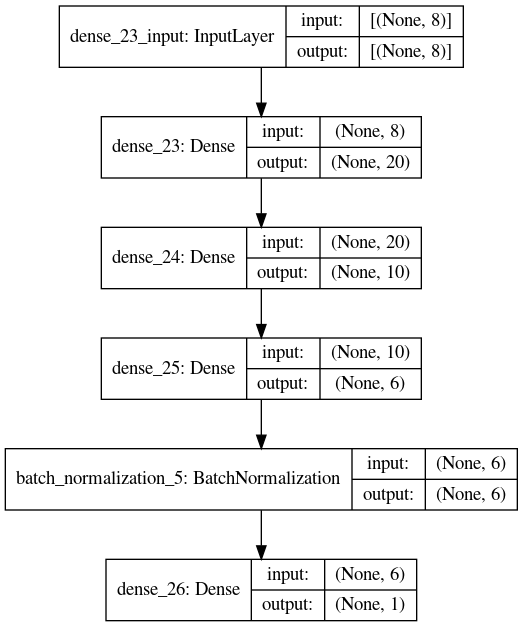

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

In [40]:
# fit the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=2)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.5f' % acc)


Epoch 1/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 2/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 3/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 4/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 5/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 6/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 7/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 8/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 9/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 10/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 11/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 12/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 13/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 14/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 15/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 16/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 17/50
348/348 - 0s - loss: 0.5498 - accuracy: 0.9644
Epoch 